# 120.LeNet-5 (1998, Yan LeCunn)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Conv2D, AveragePooling2D
from tensorflow.keras.layers import Dense, Flatten, Activation

from tensorflow.keras.datasets import mnist
np.random.seed(101)

In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
X_train_scaled = X_train / 255.
X_test_scaled = X_test / 255.

- Conv2D 는 3 차원 data 입력 요구

In [0]:
X_train_scaled = np.expand_dims(X_train_scaled, axis=3)
X_test_scaled = np.expand_dims(X_test_scaled, axis=3)

In [14]:
X_train_scaled.shape
X_test_scaled.shape

(10000, 28, 28, 1)

In [0]:
y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_test_onehot = tf.keras.utils.to_categorical(y_test)

## tf.data 를 이용한 shuffling and batch 구성

In [0]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train_onehot)).shuffle(10000).batch(128)
test_ds  = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test_onehot)).batch(128)

## LeNet 구성

In [0]:
# LeNet
model = tf.keras.Sequential()

model.add(Conv2D(6, kernel_size=5, padding="same", input_shape=(28, 28, 1)))
model.add(Activation("relu"))

model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))

model.add(Conv2D(16, kernel_size=5, padding="valid"))
model.add(Activation('relu'))

model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))

model.add(Flatten())

model.add(Dense(120))
model.add(Activation("relu"))

model.add(Dense(84))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 6)         0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_1 (Activation)    (None, 10, 10, 16)        0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0

In [0]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [20]:
%%time
history = model.fit(train_ds, epochs=50, validation_data=test_ds)

Epoch 1/50
469/469 [==============================] - 4s 8ms/step - loss: 0.3785 - accuracy: 0.8889 - val_loss: 0.1230 - val_accuracy: 0.9632
Epoch 2/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1097 - accuracy: 0.9668 - val_loss: 0.0827 - val_accuracy: 0.9754
Epoch 3/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0778 - accuracy: 0.9755 - val_loss: 0.0651 - val_accuracy: 0.9790
Epoch 4/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0609 - accuracy: 0.9815 - val_loss: 0.0465 - val_accuracy: 0.9851
Epoch 5/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0511 - accuracy: 0.9844 - val_loss: 0.0410 - val_accuracy: 0.9877
Epoch 6/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0438 - accuracy: 0.9865 - val_loss: 0.0338 - val_accuracy: 0.9881
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0380 - accuracy: 0.9878 - val_loss: 0.0369 - val_accuracy: 0.9876
Epoch 

In [0]:
score = model.evaluate(test_ds, verbose=0)

In [22]:
print("Test Score ", score[0])
print("Test Accuracy ", score[1])

Test Score  0.04418675974011421
Test Accuracy  0.991100013256073


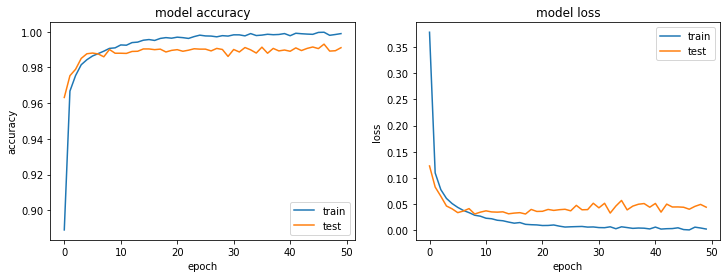

In [23]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])

In [24]:
y_pred = model.predict_classes(X_test_scaled)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1, ..., 4, 5, 6])

In [25]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))

[[ 978    0    0    0    0    0    0    0    1    1]
 [   0 1132    0    0    0    0    1    1    1    0]
 [   0    0 1021    2    1    0    3    3    2    0]
 [   0    0    0 1009    0    0    0    1    0    0]
 [   0    0    1    0  973    0    5    0    0    3]
 [   1    0    0    6    0  882    2    0    0    1]
 [   4    3    0    0    0    2  949    0    0    0]
 [   0    3    3    0    2    0    0 1016    1    3]
 [   1    0    5    5    0    1    1    2  956    3]
 [   1    2    0    2    4    1    0    2    2  995]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Test Accuracy : 0.9911


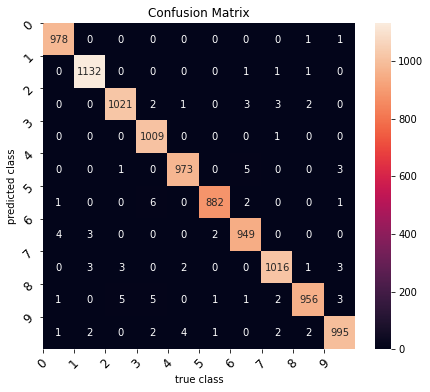

In [27]:
import seaborn as sns

plt.figure(figsize=(7,6))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

plt.xticks(np.arange(10), list(range(10)), rotation=45, fontsize=12)
plt.yticks(np.arange(10), list(range(10)), rotation=45, fontsize=12)
plt.xlabel("true class")
plt.ylabel("predicted class")
plt.title('Confusion Matrix')
print('Test Accuracy :', accuracy_score(y_test, y_pred))